# Pr√°ctica 5: An√°lisis frecuencial de se√±ales



*   Antonia Yepes Quintero
*   Isabella Bedoya Orozco



#Contextualizaci√≥n:

El an√°lisis frecuencial de se√±ales es una herramienta importante en el procesamiento de biose√±ales, ya que permite entender y analizar la informaci√≥n contenida en el dominio de la frecuencia. Muchas se√±ales de inter√©s, como las provenientes del cuerpo humano (ECG, EEG, EMG), contienen componentes de frecuencia que revelan informaci√≥n relevante sobre el estado fisiol√≥gico del organismo. Esta pr√°ctica se centra en la aplicaci√≥n de los conceptos b√°sicos del an√°lisis de Fourier y en la implementaci√≥n de filtros frecuenciales para biose√±ales digitalizadas.

A trav√©s del uso de Python y sus bibliotecas, se exploran t√©cnicas de muestreo, transformadas de Fourier y filtrado, utilizando se√±ales simuladas y reales. De esta manera, es posible adquirir un conocimiento pr√°ctico sobre c√≥mo digitalizar se√±ales continuas, analizar su contenido frecuencial, y aplicar transformaciones para eliminar el ruido no deseado o extraer componentes de inter√©s.

In [ ]:
import zipfile
import os
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from google.colab import drive
from scipy.signal import welch, get_window, find_peaks
from scipy.fft import fft, ifft

## 1. Representaci√≥n de se√±ales

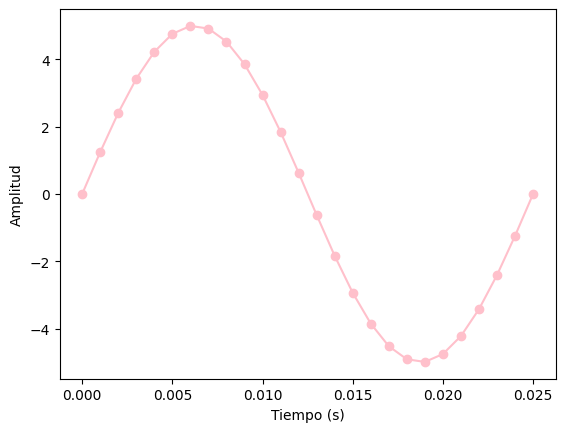

In [ ]:
Fo = 40 # Frecuencia fundamental de la se√±al
Tp = 1/Fo # Periodo de la se√±al
Fs = 1000 # Frecuencia de muestreo
T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T) # Tiempo para un ciclo de la se√±al con duraci√≥n de Tp m√°s una muestra T
A = 5
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o', color='pink')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

Se observa claramente que el periodo de la se√±al anal√≥gica o en tiempo continuo es ùëáùëù = 0,025ùë†.
Una manera alternativa de crear la se√±al ùë•(ùëõ) ser√≠a:

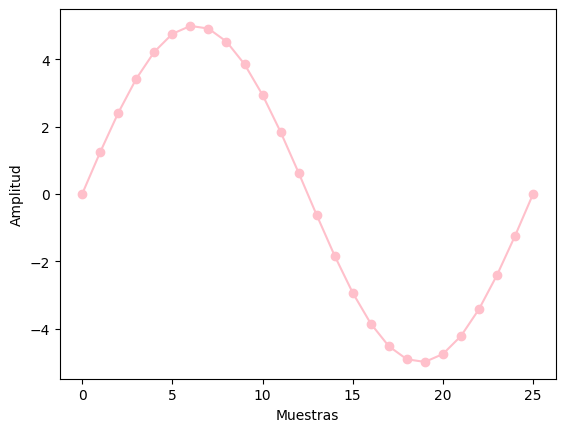

In [ ]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)
plt.plot(n, x1, marker='o', color='pink')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

a) Compruebe que los valores de las primeras cinco muestras son los mismos

In [ ]:
# Comparar las primeras 5 muestras de ambas se√±ales
first_5_x = x[:5]
first_5_x1 = x1[:5]

# Verificar si las muestras son iguales
if np.array_equal(first_5_x, first_5_x1):
    print("Las primeras 5 muestras de ambas se√±ales son iguales.")
else:
    print("Las primeras 5 muestras de ambas se√±ales son diferentes.")

print("Primeras 5 muestras de la se√±al con eje x en tiempo:", first_5_x)
print("Primeras 5 muestras de la se√±al con eje x en muestras:", first_5_x1)


Las primeras 5 muestras de ambas se√±ales son iguales.
Primeras 5 muestras de la se√±al con eje x en tiempo: [0.         1.24344944 2.40876837 3.42273553 4.22163963]
Primeras 5 muestras de la se√±al con eje x en muestras: [0.         1.24344944 2.40876837 3.42273553 4.22163963]


Al comparar los valores de las primeras cinco muestras de ambas se√±ales, se pudo comprobar que son efectivamente los mismos. Esto ocurre porque, aunque las dos se√±ales est√°n representadas en diferentes dominios (tiempo continuo para la se√±al anal√≥gica y tiempo discreto para la se√±al muestreada), ambas describen la misma funci√≥n sinusoidal con los mismos par√°metros de frecuencia y amplitud. La √∫nica diferencia entre las representaciones radica en los ejes temporales utilizados: uno en segundos y el otro en n√∫mero de muestras. Sin embargo, al ser coherentes los par√°metros de muestreo, las muestras discretizadas coinciden con los valores de la se√±al continua en los puntos correspondientes. Esto demuestra que la digitalizaci√≥n preserva la informaci√≥n esencial de la se√±al original, siempre que se utilice una frecuencia de muestreo adecuada [1].

Otra manera de graficar las se√±ales muestreadas es mediante la funci√≥n stem:

In [ ]:
plt.stem(n, x1, linefmt='pink', markerfmt='o', basefmt='r')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

## 2. Energ√≠a y potencia en el dominio del tiempo

In [ ]:
## Calcular energ√≠a, potencia y RMS para 10 ciclos discreta
t1 = np.arange(0, 10*Tp+T, T)
x1 = A * np.sin(2 * np.pi * Fo * t1)

# Calcular energ√≠a, potencia y RMS para 10 ciclos
energia10_1 = sum(x1**2)
potencia10_1 = energia10_1 / (len(t1) - 1)
rms10_1 = np.sqrt(potencia10_1)

print(f"Energ√≠a de un ciclo: {energia10_1}")
print(f"Potencia de un ciclo: {potencia10_1}")
print(f"RMS de un ciclo: {rms10_1}")

Energ√≠a de un ciclo: 3125.0000000000014
Potencia de un ciclo: 12.500000000000005
RMS de un ciclo: 3.535533905932738


In [ ]:
## Calcular energ√≠a, potencia y RMS para 10 ciclos continua
t10 = np.arange(0, 10 * Tp + T, T)
x10 = A * np.sin(2 * np.pi * Fo * t10)

# Calcular energ√≠a, potencia y RMS para 10 ciclos
energia10 = sum(x10**2)
potencia10 = energia10 / (len(t10) - 1)
rms10 = np.sqrt(potencia10)

print(f"Energ√≠a de 10 ciclos: {energia10}")
print(f"Potencia de 10 ciclos: {potencia10}")
print(f"RMS de 10 ciclos: {rms10}")

Energ√≠a de 10 ciclos: 3125.0000000000014
Potencia de 10 ciclos: 12.500000000000005
RMS de 10 ciclos: 3.535533905932738


b) La potencia es la misma que en ùë•(ùëõ). ¬øPor qu√©?

Comparando la se√±al continua y la discreta se puede decir que la potencia de la se√±al en x(t) y en x(n) es la misma porque, aunque x(t) se encuentra en el dominio continuo y x(n) en el dominio discreto, el proceso de muestreo no modifica el contenido energ√©tico de la se√±al. El muestreo simplemente toma valores de la se√±al continua en intervalos regulares, conservando las amplitudes y la relaci√≥n con la frecuencia original. Por lo tanto, aunque el tiempo en x(n) se representa mediante n√∫meros enteros en lugar de una escala continua, los valores de la se√±al y su comportamiento general se mantienen. Debido a esto, tanto la energ√≠a como la potencia media calculadas para x(t) y
x(n) son equivalentes, ya que dependen de los mismos valores de amplitud de la se√±al muestreada.

## 3. An√°lisis de Fourier en tiempo discreto:

In [ ]:
X10 = np.fft.fft(x10)

In [ ]:
plt.plot(abs(X10), color='mediumpurple')
plt.title('M√≥dulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()


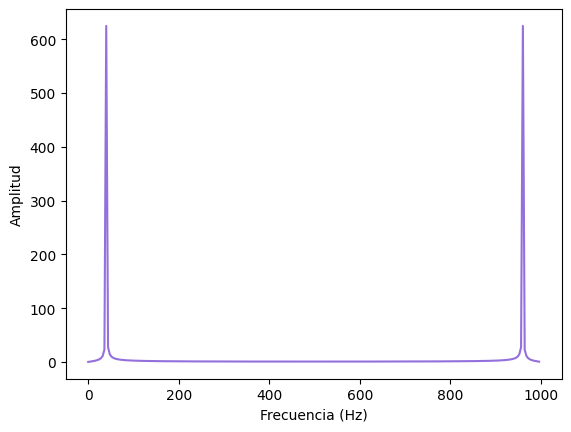

In [ ]:
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10), color='mediumpurple')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()


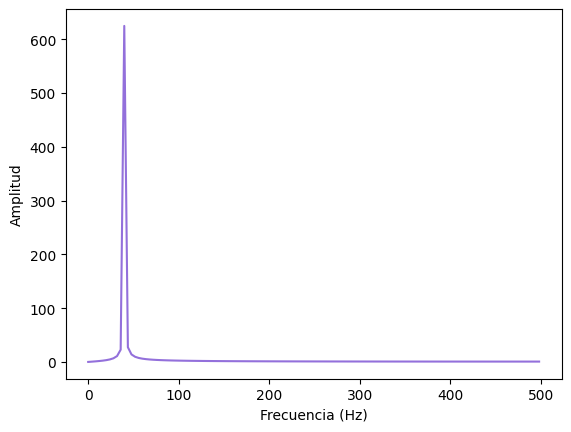

In [ ]:
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad), color='mediumpurple')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

Realizando un zoom se observa que la componente frecuencial se encuentra ubicada a 40 Hz

In [ ]:
plt.plot(Fmitad,abs(X10mitad), color='mediumpurple')
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.xlim(0,80)
plt.show()

## 4. Periodogramas



```
#importamos la rutina de welch
from scipy.signal import welch as pwelch

#%% USANDO WELCH
fs = 1000 # frecuencia de muestreo
nperseg = 2000 #ancho de la ventana
noverlap = int(nperseg/2) #solapamiento de las ventanas

f, Pxx = pwelch(senal[0,:], fs, 'hanning', nperseg, noverlap)
#grafiamos frecuencia vs potencia
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.xlim([0, 50]) #rango para el eje X
plt.show()

```



## 5. Aplicaci√≥n

#### 5.1. Cree una se√±al que sea la suma de tres componentes sinusoidales con frecuencias de 40, 80 y 160 Hz. Defina la frecuencia de muestreo m√≠nima necesaria para representar la se√±al, y utilice la frecuencia de muestreo necesaria para representarla apropiadamente

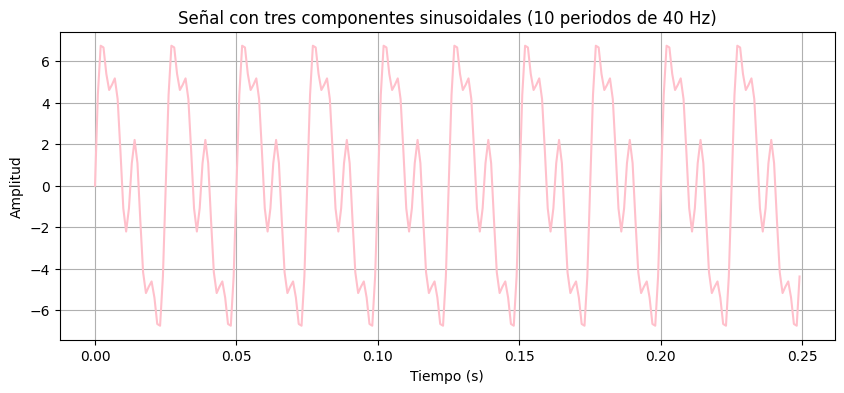

In [ ]:
# Par√°metros de la se√±al
f1 = 40   # Frecuencia 1 en Hz
f2 = 80   # Frecuencia 2 en Hz
f3 = 160  # Frecuencia 3 en Hz

# Frecuencia de muestreo (debe ser mayor que el doble de la frecuencia m√°s alta)
Fs = 1000        # Frecuencia de muestreo elegida (1000 Hz)
T = 1 / Fs       # Periodo de muestreo

# Tiempo para 10 ciclos
Tp = 1 / f1  # Periodo de 40 Hz
t_total = 10 * Tp  # Duraci√≥n de 10 periodos
t = np.arange(0, t_total, T)  # Vector de tiempo para 10 periodos

# Crear la se√±al con las tres componentes sinusoidales
signal = 5 * np.sin(2 * np.pi * f1 * t) + 3 * np.sin(2 * np.pi * f2 * t) + 2 * np.sin(2 * np.pi * f3 * t)

# Graficar la se√±al en el dominio del tiempo
plt.figure(figsize=(10, 4))
plt.plot(t, signal, color='pink')
plt.title('Se√±al con tres componentes sinusoidales (10 periodos de 40 Hz)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

Para asegurar una representaci√≥n adecuada de la se√±al compuesta, es fundamental aplicar el Teorema de Muestreo de Nyquist, que establece que la frecuencia de muestreo debe ser al menos el doble de la frecuencia m√°s alta presente en la se√±al [2]. Dado que la mayor frecuencia de la se√±al es de 160 Hz, la frecuencia de muestreo m√≠nima requerida ser√≠a de 320 Hz.

En este caso, se ha elegido una frecuencia de muestreo de 1000 Hz, lo cual supera con el m√≠nimo necesario y asegura que todas las componentes frecuenciales de la se√±al (40 Hz, 80 Hz y 160 Hz) se representen adecuadamente sin distorsi√≥n por aliasing. Esto es importante para capturar correctamente la informaci√≥n tanto de las frecuencias bajas como de las altas.


#### 5.2. Calcule la transformada de Fourier de la se√±al y grafique el espectro de frecuencia.Identifique en el espectro las frecuencias que componen la se√±al (trabaje con 10 periodos de la se√±al).

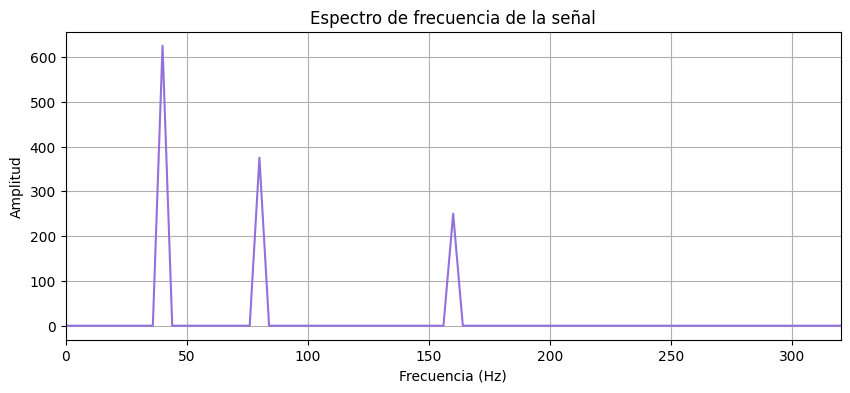

In [ ]:
# Calcular la DFT usando FFT
N = len(signal)  # N√∫mero de puntos en la DFT
X = np.fft.fft(signal)
f = np.arange(0, N) * Fs / N  # Frecuencias correspondientes

# Graficar el espectro de frecuencia
plt.figure(figsize=(10, 4))
plt.plot(f, np.abs(X), color='mediumpurple')
plt.title('Espectro de frecuencia de la se√±al')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)
plt.grid(True)
plt.show()


Frecuencias encontradas en el espectro: [ 40.  80. 160.]


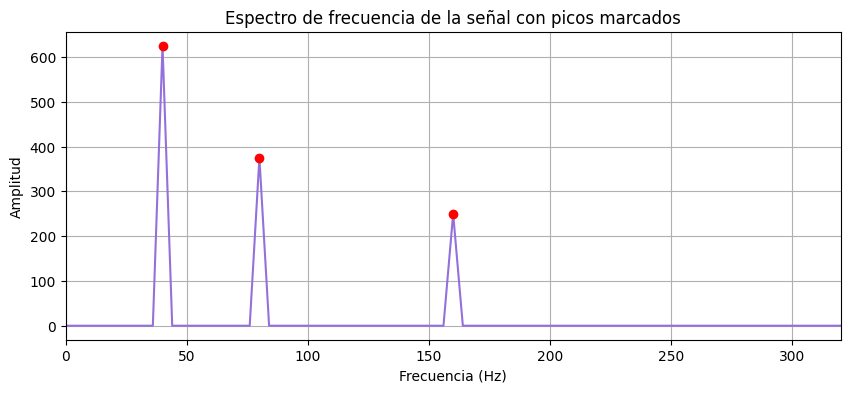

In [ ]:
# Identificar las frecuencias presentes en el espectro (hasta la frecuencia de Nyquist)
Nmitad = int(np.ceil(N/2))
Fmitad = f[:Nmitad]
Xmitad = X[:Nmitad]
# Buscar los picos en la magnitud de la DFT
peaks, _ = find_peaks(np.abs(Xmitad), height=100)  # Ajusta el par√°metro 'height' para filtrar picos peque√±os

# Imprimir las frecuencias correspondientes a los picos
frecuencias_picos = Fmitad[peaks]
print("Frecuencias encontradas en el espectro:", frecuencias_picos)

# Graficar nuevamente el espectro y marcar los picos
plt.figure(figsize=(10, 4))
plt.plot(Fmitad, np.abs(Xmitad), color='mediumpurple')
plt.plot(Fmitad[peaks], np.abs(Xmitad)[peaks], 'ro')  # Marcar los picos en rojo
plt.title('Espectro de frecuencia de la se√±al con picos marcados')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 320)
plt.grid(True)
plt.show()


#### 5.3. Consulte la funci√≥n que permite realizar el c√°lculo de la transformada inversa de Fourier. Apl√≠quelo a la se√±al anterior [3].

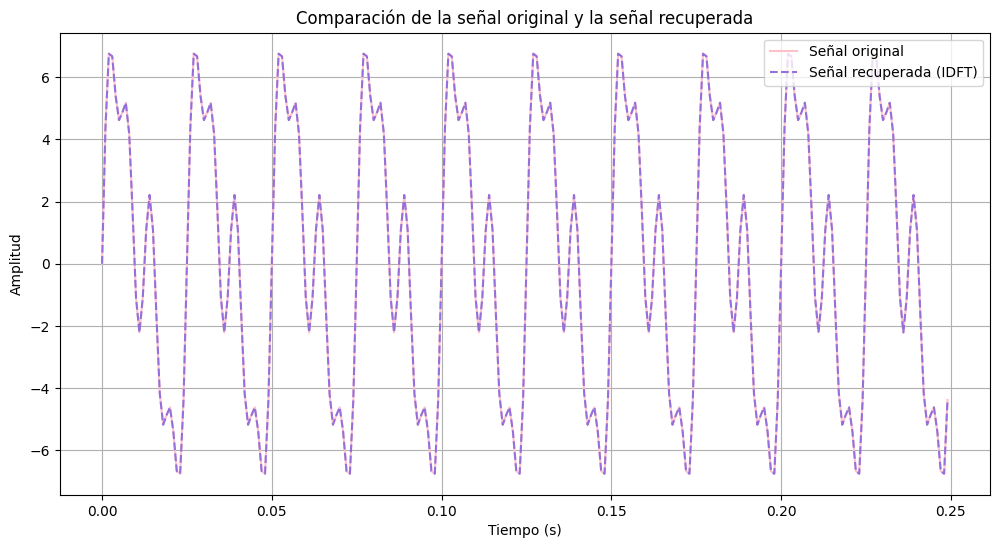

In [ ]:
# Calcular la Transformada Inversa de Fourier (IDFT)
signal_recuperada = np.fft.ifft(X)

# Graficar la se√±al original y la se√±al recuperada en una sola figura
plt.figure(figsize=(12, 6))
plt.plot(t, signal, label='Se√±al original', color='pink')  # Se√±al original (l√≠nea continua)
plt.plot(t, np.real(signal_recuperada), '--', label='Se√±al recuperada (IDFT)', color='mediumpurple')  # Se√±al recuperada (l√≠nea discontinua)
plt.title('Comparaci√≥n de la se√±al original y la se√±al recuperada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


La funci√≥n numpy.fft.ifft en Python permite calcular la Transformada Inversa de Fourier de una secuencia o se√±al en el dominio de la frecuencia. Esta funci√≥n toma una secuencia de n√∫meros complejos, generalmente obtenida despu√©s de aplicar la Transformada de Fourier (FFT) a una se√±al, y devuelve la se√±al original en el dominio del tiempo. Al aplicar la transformada inversa, se recupera la forma temporal de la se√±al a partir de su representaci√≥n en el dominio de la frecuencia, manteniendo la relaci√≥n original de amplitud y fase.

En particular, la ifft se usa cuando, despu√©s de haber realizado modificaciones en el dominio de la frecuencia (como aplicar un filtro), se desea regresar al dominio del tiempo para visualizar o analizar la se√±al resultante. La funci√≥n asegura que la transformaci√≥n sea inversa a la realizada por la fft y devuelve una secuencia que representa la se√±al reconstruida [3].

#### 5. 4 ¬øPodr√≠a decir que las siguientes l√≠neas aplican un filtro? ¬øPor qu√©?


```
F1 = np.fft.fft(x);
F2 = np.zeros((len(F1)));
F2[9:13] = F1[9:13];
xr = np.fft.ifft(F2);
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t, np.real(xr))
ax.set(xlabel='Tiempo (s)', ylabel='Amplitud (V)');
plt.show()
```



Las l√≠neas de c√≥digo aplican un tipo de filtrado en el dominio de la frecuencia. Inicialmente, se realiza la Transformada R√°pida de Fourier (FFT) de la se√±al \(x\), que convierte la se√±al del dominio del tiempo al dominio de la frecuencia, representada por \(F1\). Luego, se crea una nueva matriz \(F2\) de ceros, de la misma longitud que \(F1\), en la cual solo se conservan los componentes de frecuencia en las posiciones 9 a 13. Al establecer los dem√°s componentes de frecuencia en cero, se eliminan todas las frecuencias fuera de este rango. Finalmente, la transformada inversa de Fourier (IFFT) se aplica a \(F2\), obteniendo una se√±al filtrada \(xr\) en el dominio del tiempo, que solo contiene las frecuencias seleccionadas. Este proceso es equivalente a un filtro pasabanda, ya que permite el paso de un rango espec√≠fico de frecuencias y aten√∫a las dem√°s.

### Extraiga de manera similar cada una de las componentes de la se√±al.

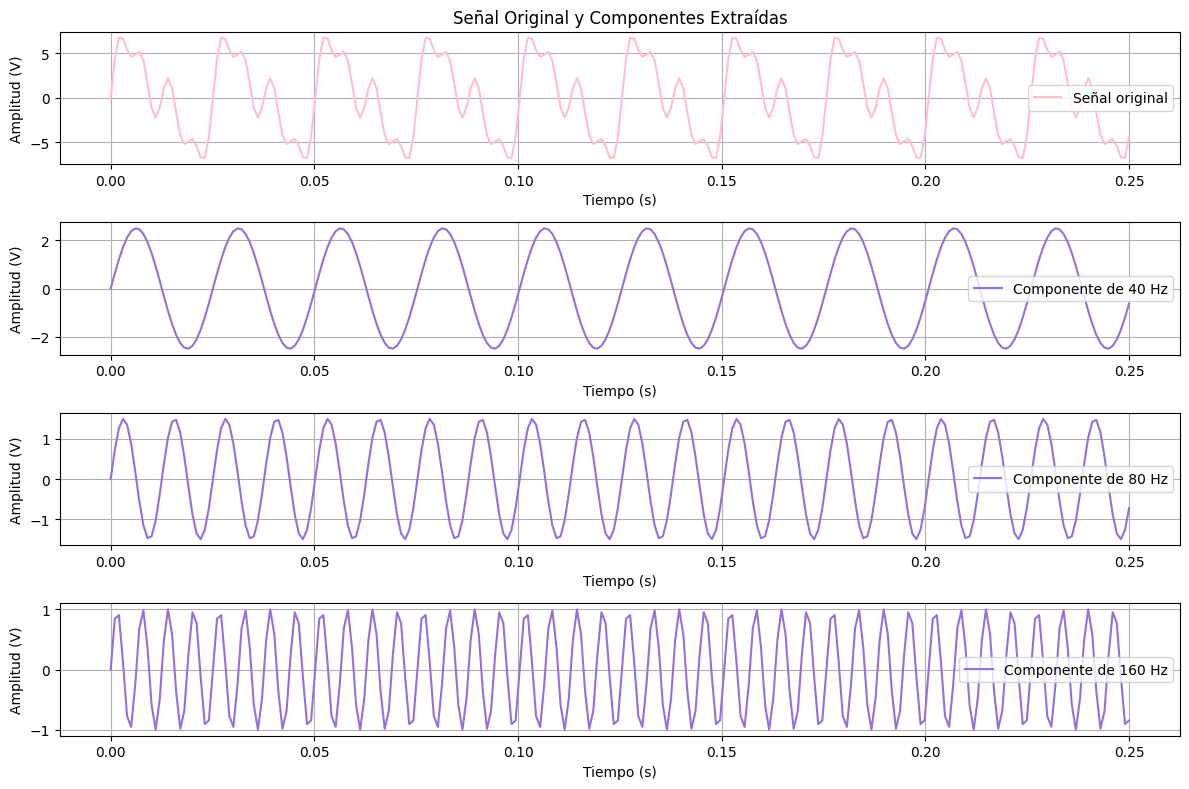

In [ ]:
# Aplicar la DFT
F1 = np.fft.fft(signal)
t = np.linspace(0, len(signal)/Fs, len(signal))


# Funci√≥n para filtrar una sola frecuencia
def filtrar_frecuencia(F1, indice_inicio, indice_fin):
    F2 = np.zeros(len(F1), dtype=complex)  # Crear un array de ceros complejo
    F2[indice_inicio:indice_fin] = F1[indice_inicio:indice_fin]  # Conservar solo el rango deseado
    return np.fft.ifft(F2)

# Extraer componente de 40 Hz
xr_40 = filtrar_frecuencia(F1, 9, 13)

# Extraer componente de 80 Hz
xr_80 = filtrar_frecuencia(F1, 19, 23)

# Extraer componente de 160 Hz
xr_160 = filtrar_frecuencia(F1, 39, 43)

# Graficar las se√±ales originales y filtradas
plt.figure(figsize=(12, 8))

# Se√±al original
plt.subplot(4, 1, 1)
plt.plot(t, signal, label='Se√±al original', color='pink')
plt.title('Se√±al Original y Componentes Extra√≠das')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 40 Hz
plt.subplot(4, 1, 2)
plt.plot(t, np.real(xr_40), label='Componente de 40 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 80 Hz
plt.subplot(4, 1, 3)
plt.plot(t, np.real(xr_80), label='Componente de 80 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

# Componente de 160 Hz
plt.subplot(4, 1, 4)
plt.plot(t, np.real(xr_160), label='Componente de 160 Hz', color='mediumpurple')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### 5.5 El archivo adjunto (senecg.mat) contiene una se√±al de ECG adquirida a una frecuencia de muestreo de 250 Hz. Realice un an√°lisis en frecuencia de la se√±al usando periodogramas de Welch y determine si es necesario eliminar ruido, en tal caso, elim√≠nelo de la forma que se mostr√≥ antes y compruebe que lo haya realizado, calcule la transformada inversa de Fourier de la se√±al filtrada y compruebe con el periodograma. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)

In [ ]:
# Cargar el archivo .mat proporcionado
drive.mount('/content/drive')

# Ruta del archivo Excel en Google Drive
file_path = '/content/drive/MyDrive/Biose√±ales/Pr√°ctica 5/senecg.mat'

mat_data = scipy.io.loadmat(file_path)

# Obtener las claves del archivo para identificar la estructura de los datos
keys = mat_data.keys()

# Mostrar las claves encontradas en el archivo .mat para identificar las variables disponibles
keys

Mounted at /content/drive


dict_keys(['__header__', '__version__', '__globals__', 'ECG'])

In [ ]:
# Extraer la se√±al de ECG del archivo .mat
ecg_signal = mat_data['ECG']

# Revisar la forma de la se√±al de ECG para entender su estructura
ecg_signal_shape = ecg_signal.shape

# Mostrar la forma de la se√±al
ecg_signal_shape

(1250, 1)

Grafica de la se√±al original

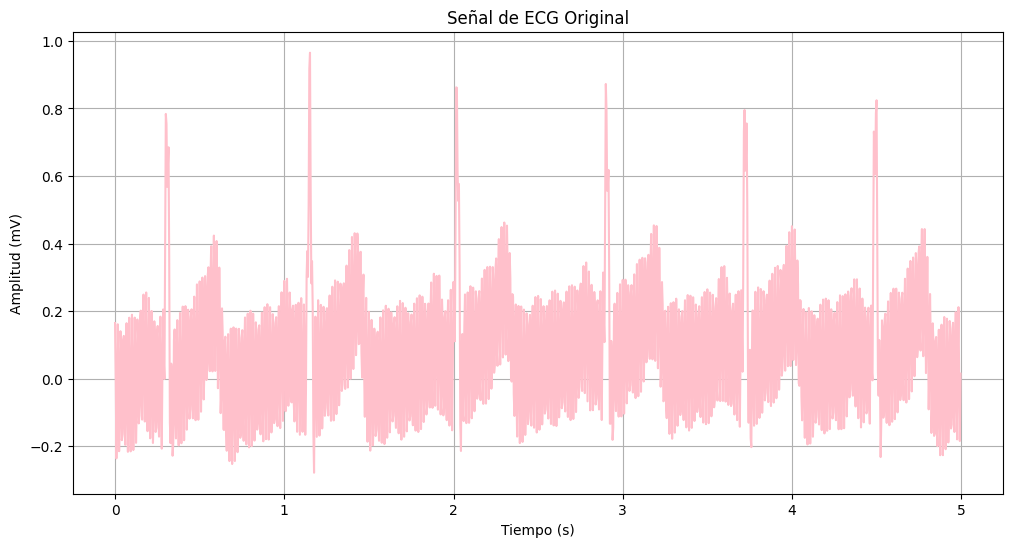

In [ ]:
# Aplanar la se√±al para evitar problemas de dimensi√≥n
ecg_signal = ecg_signal.flatten()

# Par√°metros de la se√±al de ECG
fs = 250  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(ecg_signal) / fs, 1 / fs)  # Vector de tiempo para la se√±al

# Graficar la se√±al de ECG original
plt.figure(figsize=(12, 6))
plt.plot(t, ecg_signal, color='pink')
plt.title('Se√±al de ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


Se grafica el espectro de frecuencia para ver que frecuencias componen la se√±al de ECG

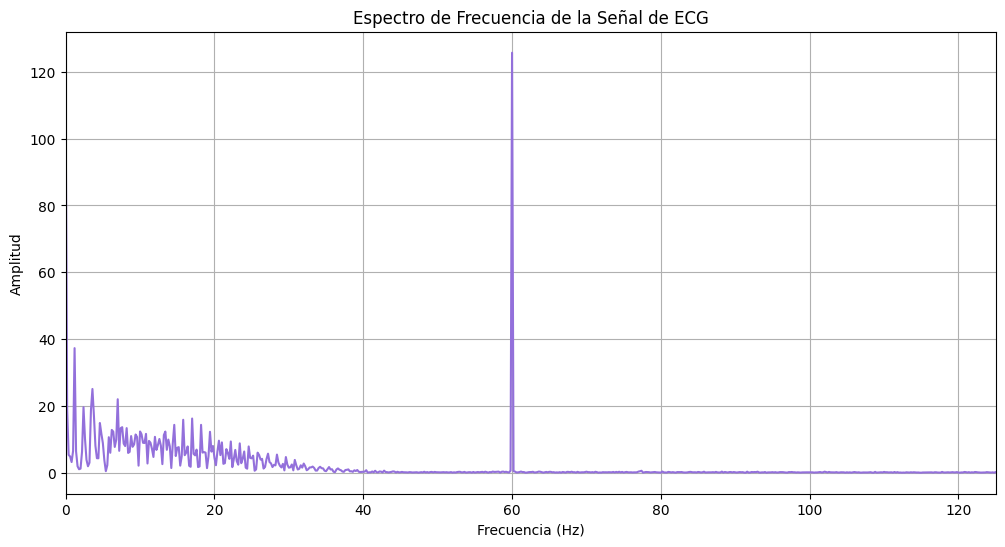

In [ ]:
# Calcular la DFT de la se√±al de ECG
N = len(ecg_signal)  # N√∫mero de puntos en la se√±al
ecg_fft = np.fft.fft(ecg_signal)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(ecg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Se√±al de ECG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()


 1. Periodograma de Welch de la se√±al original

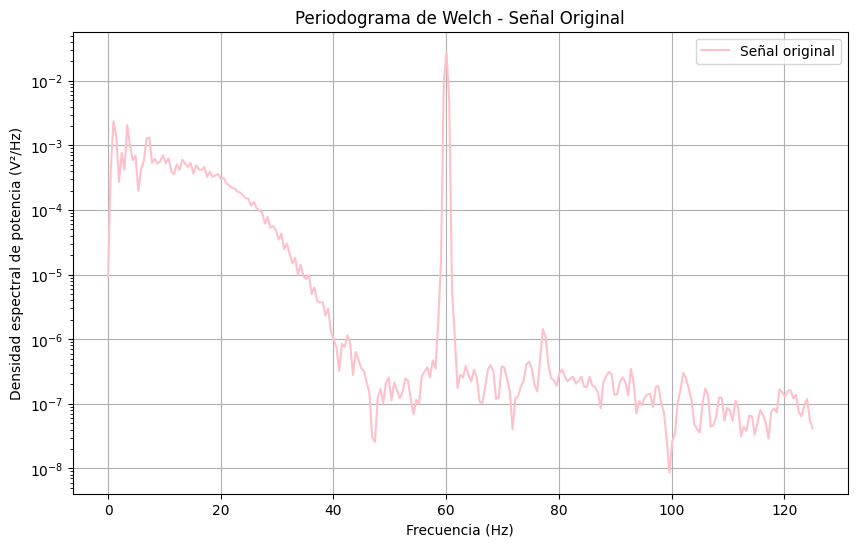

In [ ]:
# Par√°metros de la se√±al de ECG
fs = 250  # Frecuencia de muestreo (Hz)
ecg_signal = ecg_signal.flatten()

# Welch
nperseg = 512  # Ancho de la ventana
noverlap = nperseg // 2  # Solapamiento del 50%
window = get_window('hann', nperseg)  # Crear la ventana Hanning

f, Pxx = welch(ecg_signal, fs, window=window, nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma de Welch de la se√±al original
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx, label='Se√±al original', color='pink')
plt.title('Periodograma de Welch - Se√±al Original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V¬≤/Hz)')
plt.grid(True)
plt.legend()
plt.show()

En este periodograma de Welch, se observa una concentraci√≥n de energ√≠a alrededor de los 60 Hz, lo que es indicativo de la presencia de ruido el√©ctrico. Este ruido a 60 Hz suele estar asociado a interferencias de la red el√©ctrica, que es una fuente com√∫n de ruido en entornos cl√≠nicos y de adquisici√≥n de se√±ales.

Se aplica un filtro que elimina esas frecuencias que no son de inter√©s, es decir las mayores de 50 Hz.

2. Determinar si hay ruido y filtrar la se√±al

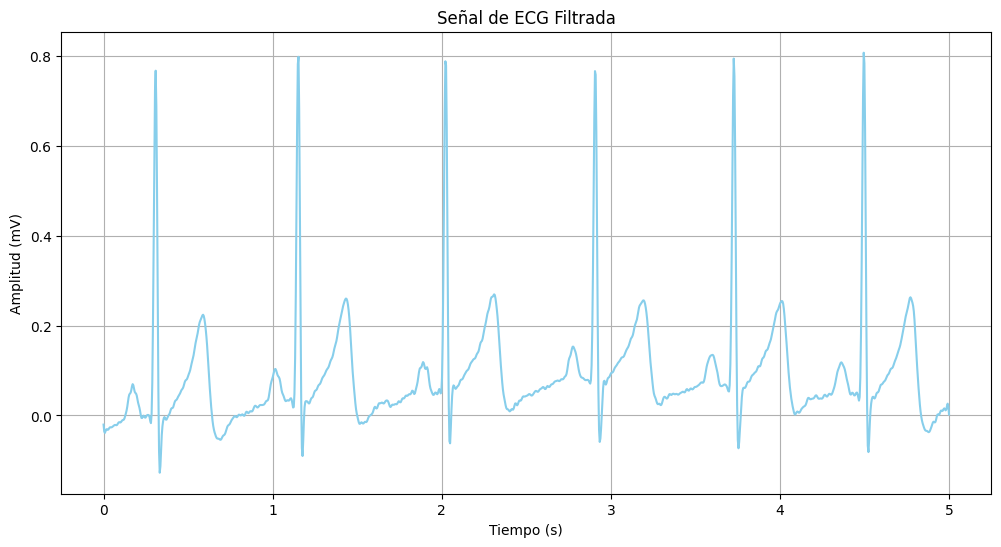

In [ ]:
# Calcular la FFT de la se√±al original
fft_ecg = np.fft.fft(ecg_signal)

# Definir las frecuencias correspondientes
n = len(fft_ecg)
frequencias = np.fft.fftfreq(n, d=1/fs)

# Definir los √≠ndices para las frecuencias a conservar (por ejemplo, entre 0 y 50 Hz)
frecuencia_corte = 50  # Frecuencia de corte en Hz
indices_frecuencia = np.where((frequencias >= 0) & (frequencias <= frecuencia_corte))

# Aplicar el filtro para mantener solo las frecuencias deseadas
fft_ecg_filtrada = np.zeros(n, dtype=complex)
fft_ecg_filtrada[indices_frecuencia] = fft_ecg[indices_frecuencia]

# Conservar tambi√©n las frecuencias negativas
fft_ecg_filtrada[-len(indices_frecuencia[0]):] = fft_ecg[-len(indices_frecuencia[0]):]

# Calcular la se√±al filtrada usando la IFFT
ecg_filtrada = np.fft.ifft(fft_ecg_filtrada)

# Graficar la se√±al filtrada
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, len(ecg_signal)/fs, len(ecg_signal)), np.real(ecg_filtrada), color='skyblue')  # Graficar la parte real de la se√±al
plt.title('Se√±al de ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()

Comprobar con el periodograma:

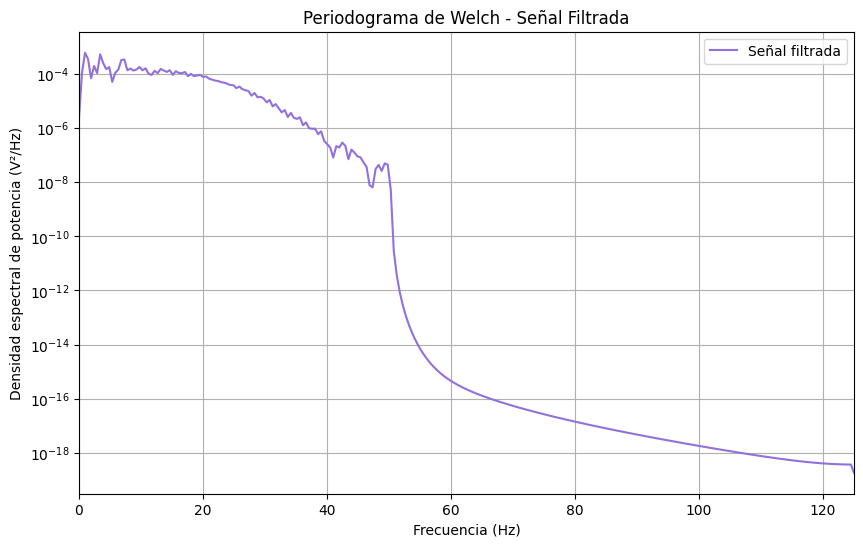

In [ ]:
# FFT de la se√±al original
ecg_fft = fft(ecg_signal)

# Filtrar la se√±al entre las frecuencias deseadas (ejemplo: 0-50 Hz)
indice_inicio = 0  # √çndice correspondiente a 0 Hz
indice_fin = int(50 * len(ecg_signal) / fs)  # √çndice correspondiente a 50 Hz
ecg_filtrada = filtrar_frecuencia(ecg_fft, indice_inicio, indice_fin)

# Periodograma de Welch de la se√±al filtrada
f_filtrada, Pxx_filtrada = welch(ecg_filtrada.real, fs, window='hann', nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma de la se√±al filtrada
plt.figure(figsize=(10, 6))
plt.semilogy(f_filtrada, Pxx_filtrada, label='Se√±al filtrada', color='mediumpurple')
plt.title('Periodograma de Welch - Se√±al Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V¬≤/Hz)')
plt.grid(True)
plt.xlim(0, 125)  # Limitar a la frecuencia de Nyquist
plt.legend()
plt.show()



El nuevo periodograma de Welch obtenido tras el filtrado de la se√±al de ECG muestra una reducci√≥n de potencia en la frecuencia de 60 Hz, que previamente estaba asociada al ruido el√©ctrico. Esto indica que el proceso de filtrado fue bueno para eliminar esa interferencia no deseada, permitiendo que las componentes de baja frecuencia, las m√°s relevantes para el an√°lisis del ECG, se mantengan sin distorsiones.

El uso de un ancho de ventana de 512 muestras y un solapamiento del 50% en el periodograma, permite una buena resoluci√≥n en el dominio de la frecuencia y una estimaci√≥n estable de la densidad espectral de potencia. El ancho de ventana seleccionado es suficiente para capturar adecuadamente las caracter√≠sticas de baja frecuencia de la se√±al, mientras que el solapamiento mejora la consistencia de la estimaci√≥n sin introducir redundancia innecesaria.

#### 5.6 Realice un an√°lisis de frecuencia a trav√©s del periodograma de welch de una se√±al de EEG de un paciente Sano y otra de un paciente con Parkinson de alg√∫n canal que en el proyecto 1 hayan identificado que presentaba diferencias, si no encontr√≥ diferencias, elija un par al azar. Realice un an√°lisis comparativo de las se√±ales seg√∫n lo que le indiquen los periodogramas. (Usar una ventana Hanning, y justificar la elecci√≥n del solapamiento y el ancho de la ventaja)

In [ ]:
drive.mount('/content/drive')

# Ruta al archivo ZIP
zip_file_path = '/content/drive/MyDrive/Biose√±ales/Pr√°ctica 5/control.zip'

# Directorio de extracci√≥n
extracted_control = '/content/drive/MyDrive/Biose√±ales/Pr√°ctica 5/extracted_data/'

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_control)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount('/content/drive')

# Ruta al archivo ZIP
zip_file_path = '/content/drive/MyDrive/Biose√±ales/Pr√°ctica 5/parkinson.zip'

# Directorio de extracci√≥n
extracted_parkinson = '/content/drive/MyDrive/Biose√±ales/Pr√°ctica 5/extracted_data/'

# Extraer el archivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_parkinson)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


EEG de un paciente sano (un solo canal):

In [ ]:
archivos_control = os.listdir(extracted_control + "/control")
sujeto_control = sio.loadmat(extracted_control + "/control/" + archivos_control[0])
data_control = sujeto_control['data']
c1_control = data_control[:, :, :]
print(c1_control.shape)

(8, 2000, 149)


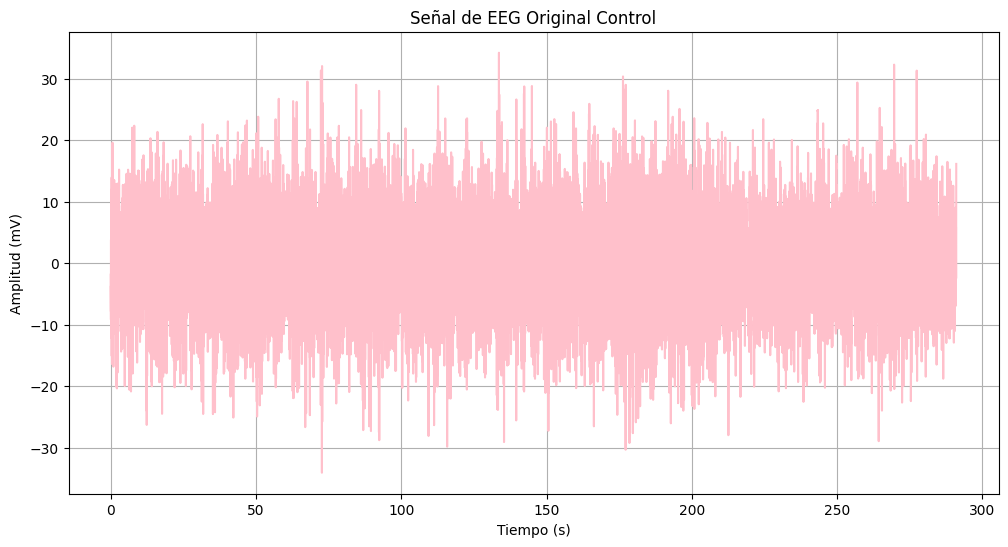

In [ ]:
eeg_control = np.reshape(c1_control, (c1_control.shape[0], c1_control.shape[1]*c1_control.shape[2]), order="F")[7]

# Par√°metros de la se√±al de EEG
fs = 1024  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(eeg_control) / fs, 1 / fs)  # Vector de tiempo para la se√±al

# Graficar la se√±al de EEG original
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_control, color='pink')  # Seleccionando la primera muestra
plt.title('Se√±al de EEG Original Control')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


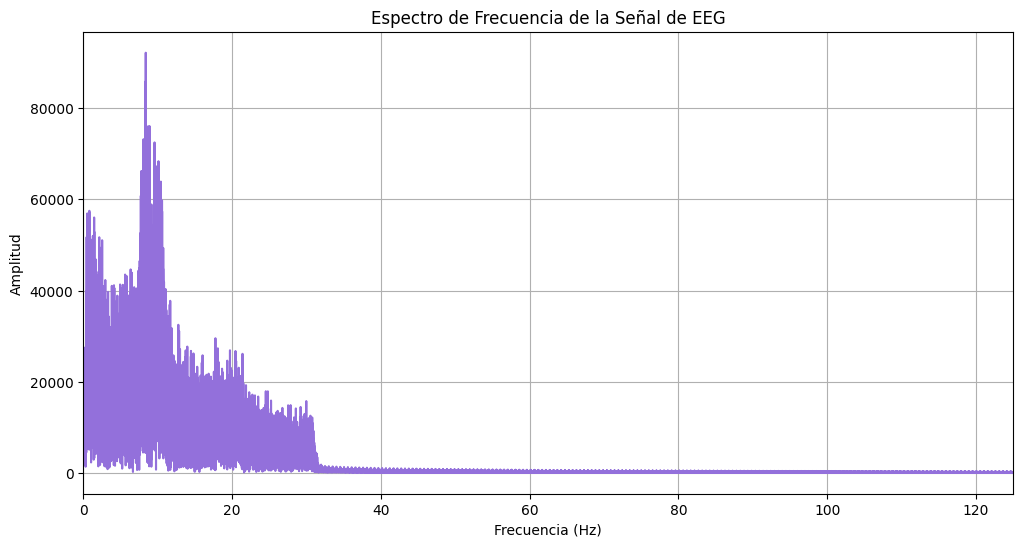

In [ ]:
# Calcular la DFT de un canal espec√≠fico de la se√±al de EEG
N = len(eeg_control)  # N√∫mero de puntos en un solo columna
eeg_fft = np.fft.fft(eeg_control)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(eeg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Se√±al de EEG')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()


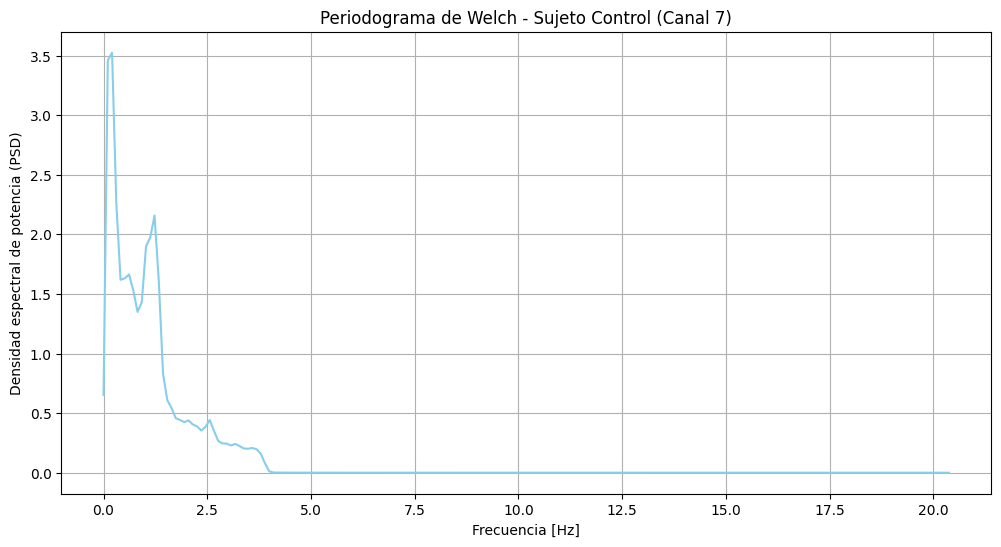

In [ ]:
fs = 1024  # Frecuencia de muestreo de las se√±ales EEG
window_size = 10000  # Tama√±o de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%

# Crear la ventana de Hann con el tama√±o correcto
window = get_window('hann', window_size)

# Se aplica el periodograma de Welch a la se√±al del sujeto Control
f_control, pxx_control = welch(eeg_control, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se grafican los periodogramas
plt.figure(figsize=(12, 6))
plt.plot(abs(f_control[0:200]), pxx_control[0:200], color="skyblue")
plt.title('Periodograma de Welch - Sujeto Control (Canal 7)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.grid()
plt.show()

In [ ]:
archivos_parkinson = os.listdir(extracted_parkinson + "/parkinson")
sujeto_parkinson = sio.loadmat(extracted_control + "/parkinson/" + archivos_parkinson[0])
data_parkinson = sujeto_parkinson['data']
c1_parkinson = data_parkinson[:, :, :]
print(c1_parkinson.shape)

(8, 2000, 143)


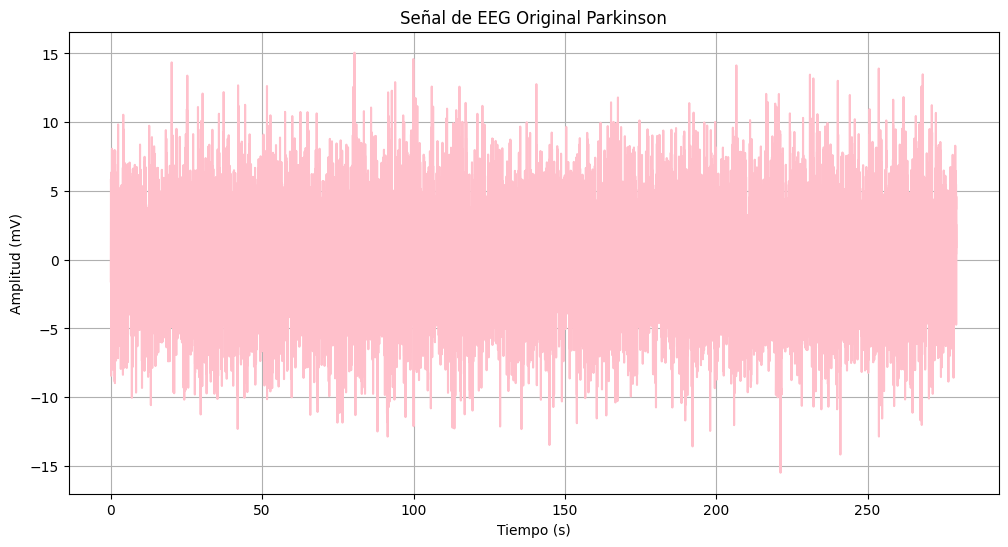

In [ ]:
eeg_parkinson = np.reshape(c1_parkinson, (c1_parkinson.shape[0], c1_parkinson.shape[1]*c1_parkinson.shape[2]), order="F")[7]

# Par√°metros de la se√±al de EEG
fs = 1024  # Frecuencia de muestreo (Hz)
t = np.arange(0, len(eeg_parkinson) / fs, 1 / fs)  # Vector de tiempo para la se√±al

# Graficar la se√±al de EEG original
plt.figure(figsize=(12, 6))
plt.plot(t, eeg_parkinson, color='pink')  # Seleccionando el primer canal
plt.title('Se√±al de EEG Original Parkinson')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.grid(True)
plt.show()


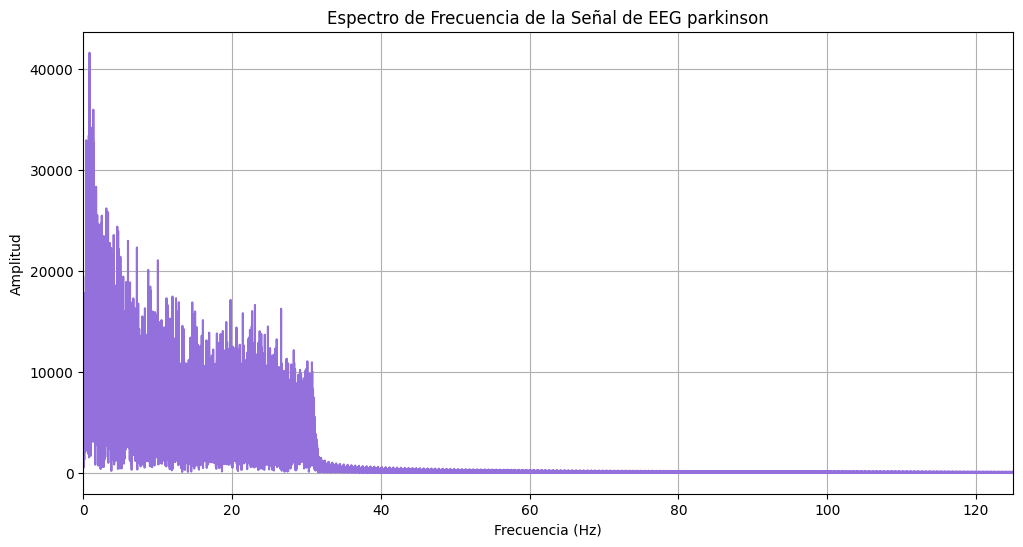

In [ ]:
# Calcular la DFT de un canal espec√≠fico de la se√±al de EEG
N = len(eeg_parkinson)  # N√∫mero de puntos
eeg_fft = np.fft.fft(eeg_parkinson)  # Transformada de Fourier
f = np.arange(0, N) * fs / N  # Vector de frecuencias

# Graficar el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(f, np.abs(eeg_fft), color='mediumpurple')
plt.title('Espectro de Frecuencia de la Se√±al de EEG parkinson')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.xlim(0, 125)  # Limitar el eje X a la mitad de la frecuencia de muestreo (Frecuencia de Nyquist)
plt.grid(True)
plt.show()

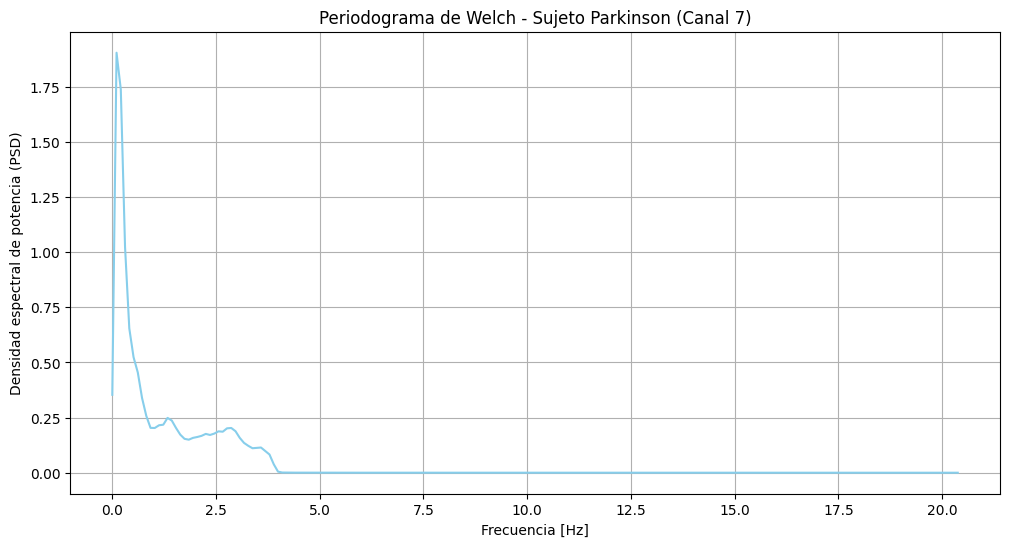

In [ ]:
fs = 1024  # Frecuencia de muestreo de las se√±ales EEG
window_size = 10000  # Tama√±o de la ventana Hanning
overlap = window_size // 2  # Solapamiento del 50%

# Crear la ventana de Hann con el tama√±o correcto
window = get_window('hann', window_size)

# Se aplica el periodograma de Welch a la se√±al del sujeto Control
f_parkinson, pxx_parkinson = welch(eeg_parkinson, fs=fs, window=window, nperseg=window_size, noverlap=overlap)

# Se grafican los periodogramas
plt.figure(figsize=(12, 6))
plt.plot(abs(f_parkinson[0:200]), pxx_parkinson[0:200], color="skyblue")
plt.title('Periodograma de Welch - Sujeto Parkinson (Canal 7)')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.grid()
plt.show()

Comparando los periodogramas de Welch de ambos sujetos, se observa que el sujeto control presenta un pico de potencia significativo en torno a 1 Hz, seguido de una ca√≠da r√°pida de la potencia en frecuencias superiores a 2 Hz, estabiliz√°ndose despu√©s de 5 Hz. Esto es t√≠pico de un EEG saludable, con una fuerte actividad en las bandas delta (frecuencias m√°s bajas) y una organizaci√≥n adecuada de las se√±ales neuronales. En el caso del sujeto con Parkinson, aunque el patr√≥n general es similar, la densidad espectral de potencia es menor en el pico de 1 Hz, lo que sugiere una menor cantidad de energ√≠a en las bandas bajas, y se observa una mayor variabilidad entre 1 Hz y 5 Hz. Esta mayor dispersi√≥n de la energ√≠a en las frecuencias bajas podr√≠a estar asociada con la desincronizaci√≥n neuronal caracter√≠stica de la enfermedad de Parkinson [5].

El uso de una ventana de 10,000 muestras en el c√°lculo del periodograma de Welch est√° justificado considerando la frecuencia de muestreo de 1024 Hz, lo que cubre aproximadamente 10 segundos de se√±al por ventana. Este tama√±o de ventana es suficiente para capturar las frecuencias relevantes para el EEG, principalmente aquellas inferiores a los 20 Hz, que son las m√°s informativas en este tipo de an√°lisis. Adem√°s, con aproximadamente 298,000 puntos en la se√±al, este tama√±o de ventana permite una segmentaci√≥n adecuada de la se√±al en varias ventanas, manteniendo un equilibrio adecuado entre la resoluci√≥n temporal y frecuencial. El solapamiento del 50% tambi√©n es el m√°s com√∫n, y es √∫til ya que mejora la consistencia en la estimaci√≥n de la densidad espectral, lo que es importante en se√±ales EEG, donde las variaciones r√°pidas de frecuencia pueden contener informaci√≥n de importancia para el an√°lisis de patolog√≠as como el Parkinson.

#Conclusiones

El an√°lisis frecuencial de las biose√±ales es importante para comprender mejor sus caracter√≠sticas en el dominio de la frecuencia y su relevancia en diversas condiciones fisiol√≥gicas. Herramientas como la Transformada de Fourier y el periodograma de Welch son particularmente √∫tiles para identificar componentes en se√±ales como el EEG y el ECG, as√≠ como para filtrar el ruido no deseado, lo que mejora la calidad de los datos adquiridos.

La elecci√≥n de una ventana adecuada y un solapamiento del 50% proporciona un equilibrio √≥ptimo entre la resoluci√≥n temporal y frecuencial, permitiendo capturar con precisi√≥n las caracter√≠sticas m√°s importantes de las se√±ales. Estos par√°metros seleccionados garantizan un an√°lisis detallado, importante para la interpretaci√≥n de las biose√±ales.

Este tipo de an√°lisis no solo tiene aplicaciones relevantes en la ingenier√≠a biom√©dica, sino que tambi√©n posee importantes implicaciones cl√≠nicas. Una correcta interpretaci√≥n de las se√±ales puede influir directamente en decisiones diagn√≥sticas y terap√©uticas, impactando positivamente en la atenci√≥n al paciente.

#Referencias

[1] Signals and Systems. (s.f.). Home | Princeton University. https://www.princeton.edu/~cuff/ele301/files/lecture1_2.pdf

[2] Nyquist Theorem - an overview. ScienceDirect. [Online]. Available: https://www.sciencedirect.com/topics/engineering/nyquist-theorem. [Accessed: Oct. 24, 2024].

[3]	‚ÄúNumpy.Fft.Ifft ‚Äî NumPy v2.2.dev0 manual,‚Äù Numpy.org. [Online]. Available: https://numpy.org/devdocs/reference/generated/numpy.fft.ifft.html. [Accessed: 23-Oct-2024].

[4] Attar ET. Review of electroencephalography signals approaches for mental stress assessment. Neurosciences (Riyadh). 2022 Oct;27(4):209-215. doi: 10.17712/nsj.2022.4.20220025. PMID: 36252972; PMCID: PMC9749579.

[5]	‚ÄúDifferences in EEG spectral features in Alzheimer‚Äôs and Parkinson‚Äôs disease with mild cognitive impairment,‚Äù MDS Abstracts, 01-Aug-2023. [Online]. Available: https://www.mdsabstracts.org/abstract/differences-in-eeg-spectral-features-in-alzheimers-and-parkinsons-disease-with-mild-cognitive-impairment/. [Accessed: 24-Oct-2024].
